# Klasifikacija skupa podataka MNIST

Skup podataka je originalni MNIST. Sastoji se od 70 000 slika dimenzija 28x28, svaka slika ima pripadnu labelu tj. naziv klase kojoj slika pripada. Klase su redom brojevi od nula do devet. Skup podatka podijeljen je, po standardnoj praksi strojnog učenja, na skup za treniranje i testiranje; 60 000 slika i 10 000 slika, respektivno.

Svaka slika ima 785 kolona. Prva kolona sadrži index klase kojoj slika pripada. Ostale kolone označavaju vrijednosti piksela pripadne slike.     

Train i test skup opisani su datotekama:
- mnist_train.csv
- mnist_test.csv

Korišteni izvori:
- 1.https://www.kaggle.com/faressayah/fashion-classification-mnist-cnn-tutorial/data#STEP-#3:-VISUALIZATION-OF-THE-DATASET
- 2.http://yann.lecun.com/exdb/mnist/
- 3.https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e


In [6]:
#import potrebnih biblioteka
import pandas as pd #za manipulaciju podataka pomoću dataframes
import numpy as np #za statističku analizu podataka
import matplotlib.pyplot as plt #za vizualizaciju podataka
import seaborn as sns # library za vizualizaciju podataka na temelju matplotliba. 
                      # Pruža sučelje visoke razine za crtanje atraktivne i informativne statističke grafike.
import random

%matplotlib inline  
sns.set_style("whitegrid")

In [7]:
# kreiramo dataframe za train i test skup podataka

# DATAFRAME - Dvodimenzionalni, potencijalno heterogeni tablični podaci koji mogu mijenjati veličinu.

train_df = pd.read_csv('..//faks/MMP/MNIST/mnist_train.csv',sep=',')
test_df = pd.read_csv('..//faks/MMP/MNIST/mnist_test.csv', sep = ',')

## Analiza skupova train i test

U ovom dijelu Jupyter bilježnice za train i test skup analizirano je sljedeće:
- broj slika u dataframe-ovima
- dimenzija dataframe-a
- imena stupaca dataframe-a
- head i tail dataframe-a
- provjera postojanja NULL vrijednosti
- broj slika u pojedinoj kategoriji (kategorije označene znamenkama 0-9)

### Analiza train skupa

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
#broj slika opisanih u datoteci mnist_train.csv
#jedan redak datoteke == jedna slika

train_df.index

RangeIndex(start=0, stop=60000, step=1)

In [9]:
#dimenzija dataframea datoteke mnist_train.csv
train_df.shape

(60000, 785)

In [7]:
#stupci datoteke mnist_train.csv
#u outputu vidimo da je svaka slika opisana podacima iz 784 stupca
#784 stupca opisuju 28x28 piksela
#prvi stupac odnosi se na labelu, odnosno na id, slike

train_df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [8]:
#head (prvih 5 redaka) dataframe-a datoteke mnist_train.csv

train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#prikaz posljednjih redaka dataframea datoteke mnist_train.csv
train_df.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#provjera NULL vrijednosti dataframea datoteke mnist_train.csv
#NULL != 0

print(str(train_df.isnull().values.any()))

False


In [11]:
#kardinalitet kategorija dataframea datoteke mnist_train.csv
#svaka slika pripada jednoj od 10 kategorija
#u outputu vidimo da je broj slika koje pripadaju pojedinoj kategoriji jednak za svaku kategoriju

train_df.groupby('label').size()

label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

### Analiza test skupa

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [13]:
#broj slika opisanih u datoteci mnist_test.csv
#jedan redak datoteke == jedna slika

test_df.index

RangeIndex(start=0, stop=10000, step=1)

In [12]:
#dimenzija dataframea datoteke mnist_test.csv
test_df.shape

(10000, 785)

In [13]:
#stupci datoteke mnist_test.csv
#u outputu vidimo da je svaka slika opisana podacima iz 784 stupca
#784 stupca opisuju 28x28 piksela
#prvi stupac odnosi se na labelu, odnosno na id, slike

#očekivano, budući da su train i test skupovi nastali iz istog skupa podataka

train_df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [18]:
#head (prvih 5 redaka) dataframe-a datoteke mnist_train.csv

test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#head (prvih 5 redaka) dataframe-a datoteke mnist_train.csv

test_df.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#provjera NULL vrijednosti dataframea datoteke mnist_test.csv

print(str(test_df.isnull().values.any()))

False


In [16]:
#kardinalitet kategorija dataframea datoteke mnist_train.csv
#svaka slika pripada jednoj od 10 kategorija
#u outputu vidimo da je broj slika koje pripadaju pojedinoj kategoriji nejednako raspoređen po kategorijama

test_df.groupby('label').size()

label
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
dtype: int64

Text(0.5, 1.0, 'Znamenke - distribucija')

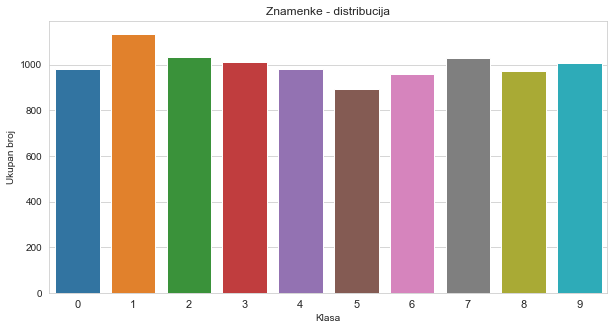

In [4]:
#grafički prikaz prethodnog outputa

yy = pd.value_counts(test_df['label'])

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
#sns.set_style("white")  #graf istaknutiji sa sivom pozadinom

ax = sns.barplot(x = yy.index, y = yy, data = test_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 11)
ax.set(xlabel='Klasa', ylabel='Ukupan broj')
ax.set_title('Znamenke - distribucija')

## Prikaz slika

In [17]:
#iz train i test skupova podataka kreiramo nizove podataka da bismo dobili prikaz slike koristeći podatke o pikselima iz pripadnih datoteka
train = np.array(train_df, dtype = 'float32')
test = np.array(test_df, dtype='float32')

In [18]:
#prikaz dijela niza train
#svaka slika u nizu opisana je nizom piksela iz pripadnog reda
train

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
#detaljan prikaz niza prve slike iz skupa train
train[0]

array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   4.,   0.,   0.,   0.,   0.,   0.,  62.,  61.,  21.,  29.,
        23.,  51., 136.,  61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.,
       201., 228., 225., 255., 115.,  62., 137., 255., 235., 222., 255.,
       135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  47., 252., 234., 238., 22

In [30]:
#prikaz dijela niza test
test

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
#deklariranje niza klasa

class_names = ['nula', 'jedan', 'dva', 'tri', 'četiri', 
               'pet', 'šest', 'sedam', 'osam', 'devet']

Za nastavak analize potrebno je naznačiti koja labela (stupac label) predstavlja koju kategoriju.

- 0: nula
- 1: jedan
- 2: dva
- 3: tri
- 4: četiri
- 5: šet
- 6: šest
- 7: sedam
- 8: osam
- 9: devet

Text(0.5, 1.0, 'sedam')

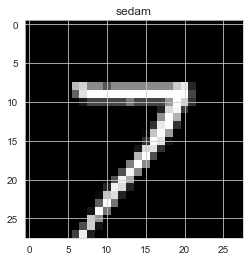

In [20]:
#prikaz random slike iz train skupa u gray-scale-u

i = random.randint(1,60000) #odabir random indeksa od 1 do 60,000
plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
label_index = train_df["label"][i]
plt.title(f"{class_names[label_index]}")

Text(0.5, 1.0, 'sedam')

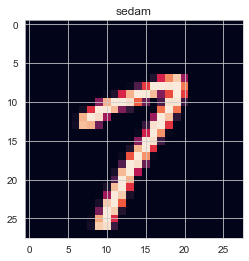

In [21]:
#prikaz random slike iz train skupa u boji

i = random.randint(1,60000) #odabir random indeksa od 1 do 60,000
plt.imshow(train[i,1:].reshape((28,28))) # reshape i plot slike
label_index = train_df["label"][i]
plt.title(f"{class_names[label_index]}")

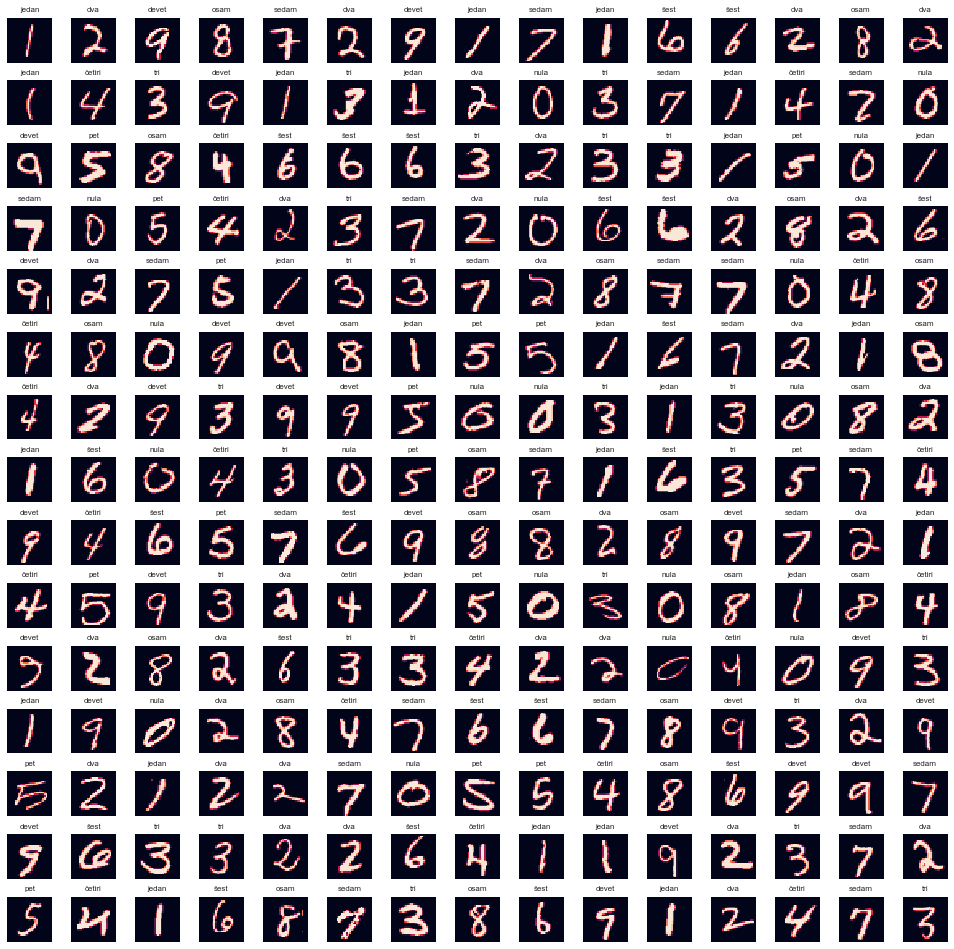

In [25]:
#ova input cell izvršava se malo duže zbog većeg broja podataka

# Prikaz slika u grid formatu
# Definiramo dimenzije 
W_grid = 15
L_grid = 15

# subplot vraća figure objekt and axes objekt
# koristimo axes object kako bismo prikazali specifične slike na različitim lokacijama

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # izravnavanje 15 x 15 matrice u 225 array

n_train = len(train) # duljina seta podataka za treniranje

# Random broj od 0 do n_train
for i in np.arange(0, W_grid * L_grid): # kreiranje ravnomjerno raspoređenih varijabli

    index = np.random.randint(0, n_train)
    # pročitaj i prikaži sliku sa označenim ideksom     
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [26]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [27]:
X_corr = test_df.corr()

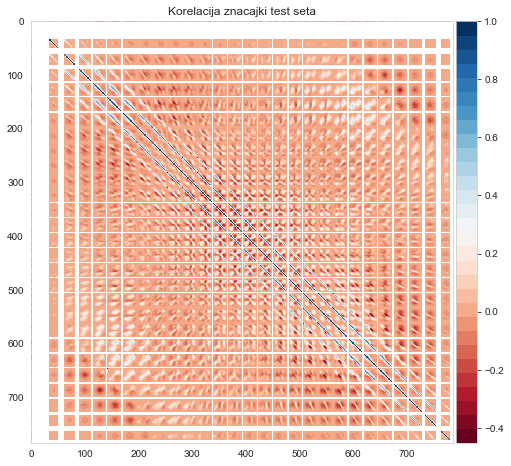

In [30]:
#korelacija značajki test skupa podataka
#output je očekivan, radi se o 10 000 slika od kojih je svaka opisana s 784 vrijednosti

cmap = cm.get_cmap('RdBu', 30)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iax = ax.imshow(X_corr, interpolation="nearest", cmap=cmap)
ax.grid(False)
ax.set(title='Korelacija znacajki test seta')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(iax,cax)

plt.show()

## Priprema podataka za treniranje

In [38]:
# Kreiranje redova za treniranje i testiranje
train = np.array(train_df, dtype = 'float32')
test = np.array(test_df, dtype='float32')

# Priprema dataseta za treniranje i testiranje 
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

Podijelili smo naš set podatka za treniranje u podatke za treniranje i podatke za validaciju dataseta.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [16]:
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [35]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)


## Kreiranje modela

Izgradnja neuronske mreže zahtijeva konfiguriranje slojeva modela, zatim sastavljanje modela.



In [36]:
import tensorflow as tf

In [37]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

Slojevi koji se koriste:
* keras.layers.Input - ulazni podaci
* keras.layers.Flatten - transformira format slike iz dvodimenzionalnog niza (od 28 do 28 piksela) u jednodimenzionalni niz (od 28 * 28 = 784 piksela
* keras.layers.Dense - su gusto povezani ili potpuno povezani neuronski slojevi. Prvi gusti sloj ima 128 čvorova (ili neurona). Drugi (i zadnji) sloj je softmax sloj od 10 čvorova koji vraća niz od 10 vjerovatnoća rezultata koji zbroje na 1. Svaki čvor sadrži rezultat koji pokazuje vjerojatnost da trenutna slika pripada jednoj od 10 klasa
* keras.layers.Dropout - na random bira slike za projveru kako bi se izbjeglo namjestanje
* keras.layers.Dense, implementira operacije nad tenzorima 

In [27]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


Podaci koje smo dobili su u 2d formatu. Budući da se za izlazni skup očekuje da ima visinu, širinu i oznaku klase, trebamo ga preoblikovati.

In [28]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [39]:
# Označimo broj klasa
K = len(set(y_train))
print("Broj klasa:", K)

Broj klasa: 10


### Stastavljanje modela
Prije nego što je model spreman za treniranje, treba mu još nekoliko postavki. Dodaju se tijekom koraka sastavljanja modela:

 * Funkcija gubitka - Ona mjeri koliko je model precizan tijekom treninga. Želite minimizirati ovu funkciju kako biste "usmjeravali" model u pravom smjeru.
 * Optimizator - Ovo je kako se model ažurira na temelju podataka koje vidi i funkcije gubitka.
 * Metrike - Koristi se za nadgledanje koraka obuke i testiranja

Model grupira slojeve u objekt sa treniranim i očekivanim obilježjima.

In [30]:

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [32]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 278us/sample - loss: 0.1804 - accuracy: 0.9444 - val_loss: 0.0657 - val_accuracy: 0.9787
Epoch 2/20
60000/60000 [==============================] - 15s 253us/sample - loss: 0.0669 - accuracy: 0.9797 - val_loss: 0.0351 - val_accuracy: 0.9884
Epoch 3/20
60000/60000 [==============================] - 15s 255us/sample - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0377 - val_accuracy: 0.9874
Epoch 4/20
60000/60000 [==============================] - 15s 254us/sample - loss: 0.0384 - accuracy: 0.9876 - val_loss: 0.0319 - val_accuracy: 0.9907
Epoch 5/20
60000/60000 [==============================] - 15s 256us/sample - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0475 - val_accuracy: 0.9877
Epoch 6/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.0404 - val_accuracy: 0.9868
Epoch 7/20
60000/60000 [====================

### Funkcija gubitka

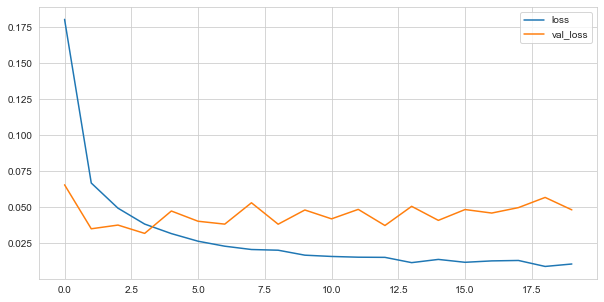

In [33]:
# Gubitak po iteraciji
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,5]
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

### Prikaz točnosti

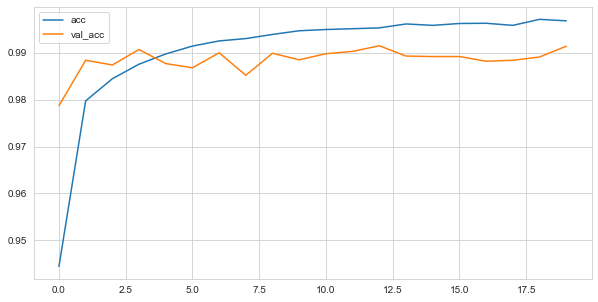

In [35]:
# Točnost po iteraciji
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### Confusion matrix

Matrica konfuzije, bez normalizacije
[[ 976    1    0    0    0    0    1    1    1    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   1    1 1024    0    1    0    0    5    0    0]
 [   0    0    0 1007    0    1    0    2    0    0]
 [   0    0    1    0  969    0    3    0    1    8]
 [   0    0    0   10    0  880    1    1    0    0]
 [   3    4    0    0    2    2  946    0    1    0]
 [   1    6    2    0    1    0    0 1018    0    0]
 [   1    1    1    1    0    1    1    0  967    1]
 [   0    1    0    3    4    4    0    2    2  993]]


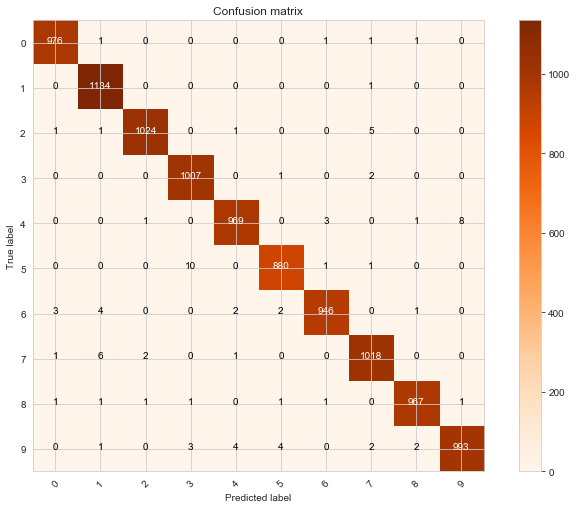

In [43]:

from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalizirana matrica konfuzije")
  else:
      print('Matrica konfuzije, bez normalizacije')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

### Definiranje labela - naziva klasa

In [38]:
labels = '''nula
jedan
sva
tri
četiri
pet
šest
sedam
osam
devet'''.split("\n")

### Pregled predikcija - primjer dobre predikcije i loše

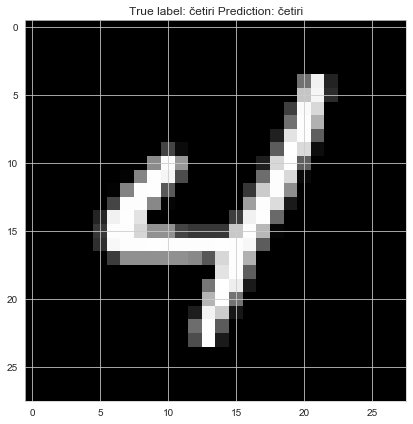

In [39]:
misclassified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Prediction: %s" % (labels[y_test[i]], labels[p_test[i]]));

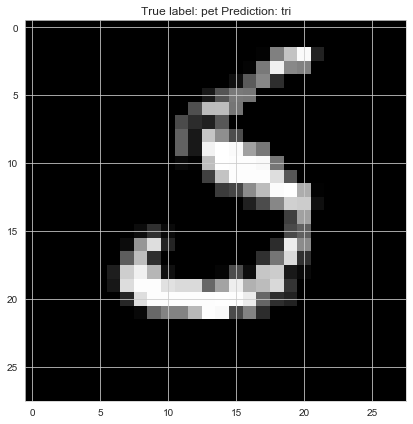

In [40]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Prediction: %s" % (labels[y_test[i]], labels[p_test[i]]));